In [2]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import numpy as np
from numpy.linalg import slogdet
%matplotlib inline
from matplotlib import pyplot as plt
bempp.api.show_available_platforms_and_devices()
bempp.api.set_default_device(0, 0)

0: Portable Computing Language
    0: pthread-Intel(R) Xeon(R) W-2155 CPU @ 3.30GHz


We are defining an exponentially adapted trapezoid rule and choose the quadrature points accordingly.

In [13]:
h = 0.1

center1 = (2, 0, 0)
center2 = (-2, 0, 0)

sphere1 = bempp.api.shapes.sphere(h=h, origin=center1)
sphere2 = bempp.api.shapes.sphere(h=h, origin=center2)

rwg1 = bempp.api.function_space(sphere1, "RWG", 0)
rwg2 = bempp.api.function_space(sphere2, "RWG", 0)

snc1 = bempp.api.function_space(sphere1, "SNC", 0)
snc2 = bempp.api.function_space(sphere2, "SNC", 0)

wavenumber = 1j*0.05

op11 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg1, snc1, wavenumber)
op22 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg2, snc2, wavenumber)
op21 = bempp.api.operators.boundary.maxwell.electric_field(rwg1, rwg2, snc2, wavenumber)
op12 = bempp.api.operators.boundary.maxwell.electric_field(rwg2, rwg1, snc1, wavenumber)

mat11 = op11.weak_form().A
mat12 = op12.weak_form().A
mat21 = op21.weak_form().A
mat22 = op22.weak_form().A
mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
mat21_zero = np.zeros((mat22.shape[0],mat11.shape[1]))


mat = np.block([[mat11,mat12],[mat21,mat22]]) 
mat2 = np.block([[mat11,mat12_zero],[mat21_zero,mat22]])

In [14]:
Eigs1,evals1 = np.linalg.eig(mat)
Eigs2,evals2 = np.linalg.eig(mat2)

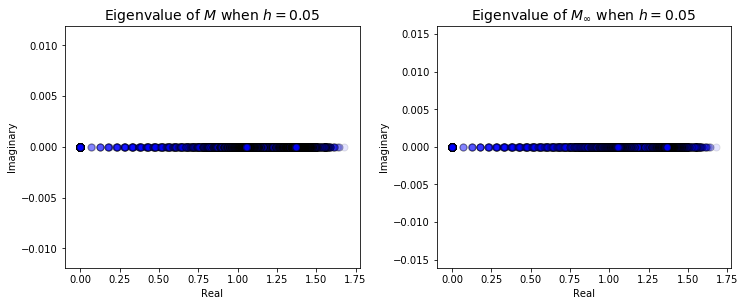

In [15]:
fig = plt.figure(figsize = (12,6))
ax1 = plt.subplot(121)
ax1.scatter(np.real(Eigs1),np.imag(Eigs1),color='b', s=50, alpha=.1, edgecolors='black')
ax1.set_title('Eigenvalue of $M$ when $h=0.05$', fontsize = 14)
ax1.set(xlabel='Real', ylabel='Imaginary')
fig.tight_layout(pad= 7.0)
ax2 = plt.subplot(122)
ax2.scatter(np.real(Eigs2),np.imag(Eigs2),color='b', s=50, alpha=.1, edgecolors='black')
ax2.set_title('Eigenvalue of $M_{\infty}$ when $h=0.05$', fontsize = 14)
ax2.set(xlabel='Real', ylabel='Imaginary')
fig.savefig('Eigenalue005.pdf')

In [12]:
Eigs1

array([3.27624820e+00+0.j, 3.27952485e+00+0.j, 3.19411913e+00+0.j, ...,
       1.96593331e-05+0.j, 1.97383741e-05+0.j, 1.95927237e-05+0.j])